In [9]:
# !pip install emnist 

In [2]:
from emnist import extract_training_samples

In [3]:
img, labels = extract_training_samples('letters')

In [4]:
img = img/255

theory:
28*28 pixel images = 784 neurons -> inputs. 
26 letters = 26 neurons ->outputs.

for hidden layers, let's experiment and see what works.

In [5]:
#training and testing data split
img_train, img_test = img[:60000], img[60000:70000] 
label_train, label_test = labels[:60000], labels[60000:70000] 

In [6]:
img_train = img_train.reshape(60000,784)
img_test = img_test.reshape(10000,784)

Using MLP from sklearn.

In [7]:
 from sklearn.datasets import fetch_openml

In [8]:
from sklearn.neural_network import MLPClassifier

Trying diiferent combinations of epochs and hidden layers

In [9]:
mlp1 = MLPClassifier(hidden_layer_sizes=(50,),max_iter=20,alpha=1e-4,
                        solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [10]:
#error of the loss function
mlp1.fit(img_train,label_train)
print("training set score: ",mlp1.score(img_train,label_train))
print("test set score: ",mlp1.score(img_test,label_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732


C:\Users\91924\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training set score:  0.8865
test set score:  0.8408


displaying confusion matrix to see where the network made most of it's mistakes

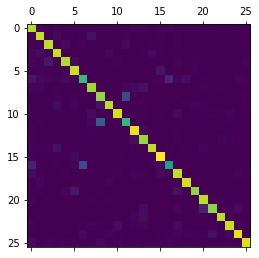

In [12]:
label_pred = mlp1.predict(img_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test,label_pred)

import matplotlib.pyplot as plt
plt.matshow(cm)

we can notice that:
-> i,j letters (at (9,10)) are mixed up.
-> 

In [20]:
#cheching the mixed up letters.

p_letter = 'l'
a_letter = 'i'

miss = []
for i in range(len(label_test)):
    if(label_test[i]== ord(p_letter)-96 and label_pred[i]==ord(a_letter)-96):
        miss.append(i)
print("number of times they mixed up the letters = ",len(miss))

number of times they mixed up the letters =  109


In [22]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,),max_iter=50,alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(img_train,label_train)
print("training set score: ",mlp2.score(img_train,label_train))
print("test set score: ",mlp2.score(img_test,label_test))

Iteration 1, loss = 1.15599672
Iteration 2, loss = 0.54834774
Iteration 3, loss = 0.44784035
Iteration 4, loss = 0.39865207
Iteration 5, loss = 0.36308811
Iteration 6, loss = 0.33567397
Iteration 7, loss = 0.31904877
Iteration 8, loss = 0.29485588
Iteration 9, loss = 0.27846574
Iteration 10, loss = 0.26938228
Iteration 11, loss = 0.25802023
Iteration 12, loss = 0.25788280
Iteration 13, loss = 0.24760647
Iteration 14, loss = 0.24042815
Iteration 15, loss = 0.23627495
Iteration 16, loss = 0.22204688
Iteration 17, loss = 0.21618327
Iteration 18, loss = 0.21659199
Iteration 19, loss = 0.21743049
Iteration 20, loss = 0.21713851
Iteration 21, loss = 0.21081051
Iteration 22, loss = 0.20190616
Iteration 23, loss = 0.20160297
Iteration 24, loss = 0.20444959
Iteration 25, loss = 0.19542590
Iteration 26, loss = 0.20111642
Iteration 27, loss = 0.20414227
Iteration 28, loss = 0.18630043
Iteration 29, loss = 0.18877581
Iteration 30, loss = 0.18547905
Iteration 31, loss = 0.19368002
Iteration 32, los

C:\Users\91924\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training set score:  0.94875
test set score:  0.8855
